In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

#### 1. Load datasets

In [13]:
# dataset_name = 'iris'
# perc = 100

# df_train = pd.read_csv(f'../datasets/{dataset_name}/regular/{dataset_name}_train_perc{perc}.csv')
# df_test = pd.read_csv('../datasets/' + dataset_name + '/regular/' + dataset_name + '_test.csv')
# df_val = pd.read_csv('../datasets/' + dataset_name + '/regular/' + dataset_name + '_val.csv')

In [25]:
dataset_name = 'abalone'
perc = 1

df_train = pd.read_csv(f'../datasets/{dataset_name}/extreme/{perc}/{dataset_name}_train_perc{perc}.csv')
df_test = pd.read_csv(f'../datasets/{dataset_name}/extreme/{perc}/{dataset_name}_test_perc{perc}.csv')

In [26]:
n_classes = len(set(df_train[df_train.columns[-1]]))
print(n_classes)
len(set(df_test[df_test.columns[-1]]))

23


23

In [27]:
if any(isinstance(df_train[x][0], str) for x in df_train.columns):
    ### ----- IF DATA IS CATEGORICAL ----- ##
    print("Categorical data - let's one hot encode the features!\n")
    print("Number of features before:", len(df_train.columns))
    df_train['set type'] = 'train'
    df_test['set type'] = 'test'
#     df_val['set type'] = 'val'

#     total_df = pd.concat([df_train, df_test, df_val])
    total_df = pd.concat([df_train, df_test])
    cols = list(total_df.columns)
    total_df = pd.get_dummies(total_df, columns=total_df.columns[:-2])
    
    cols = list(total_df.columns)
    cols = cols[1:] + cols[:1]
    total_df = total_df[cols]
    
    df_train = total_df[total_df['set type'] == 'train']
    df_test = total_df[total_df['set type'] == 'test']
#     df_val = total_df[total_df['set type'] == 'val']

    del df_train['set type']
    del df_test['set type']
#     del df_val['set type']
    
    print("Number of features after one hot encoding:", len(df_train.columns))

In [28]:
target_name = df_train.columns[-1]
X_train, y_train = df_train.drop([target_name], axis='columns'), df_train[target_name]
X_test, y_test = df_test.drop([target_name], axis='columns'), df_test[target_name]
# X_val, y_val = df_val.drop([target_name], axis='columns'), df_val[target_name]

#### 2. Train data using the randomforest classifier

In [29]:
model = RandomForestClassifier(n_estimators=40)

In [35]:
total_sum = 0
n_iter = 50
for i in range(n_iter):
    model.fit(X_train, y_train)
    s = model.score(X_test, y_test)
    total_sum += s
total_sum/n_iter

0.2012372634643377

On validation set

In [31]:
# model.score(X_val, y_val)

#### 3. Evaluate test set with confusion matrix

In [32]:
y_pred = model.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 12,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 28,  19,   3,   2,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 13,  34,   8,  20,  39,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  20,   6,  48, 157,   9,  12,   0,   1,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   6,  98, 171,  44,  52,   4,   4,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   1, 112,  85, 153, 137,  39,  20,   5,   1,   2,   0,
          0,   0,   2,   0,   1,   0,   1,   0,   0,   0],
       [  0,   1,   0,  52,  56, 183, 157, 113,  91,   7,   2,   2,   1,
          0,   0,   2,   3,   9,   0,   3,   0,   0,   0],
       [  0,   0,   0,  13,  50, 121, 127, 105, 134,  18,   6,   0,   3,
   

#### 4. Plot results

Text(33.0, 0.5, 'true')

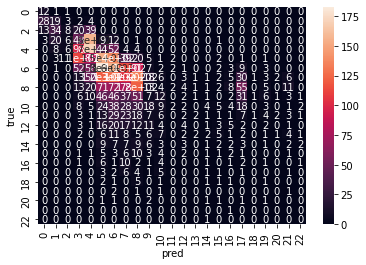

In [34]:
sn.heatmap(cm, annot=True)
plt.xlabel('pred')
plt.ylabel('true')